# 程序填空一：

In [1]:
import numpy as np
np.random.seed(6)  ##设定随机种子，不要改动！

#生成成绩：随机整数，范围在[40,100)之间,二维数组，每行数据依次为某同学的语文、数学、英语这三门课的成绩
scores=np.random.randint(40,100,(50,3)) #(1)
#请输入分数：
score=int(input("请输入分数："))

请输入分数：55


In [3]:
mask=scores<score
mask

array([[ True,  True, False],
       [False, False, False],
       [False, False, False],
       [False,  True,  True],
       [ True, False, False],
       [False, False, False],
       [False,  True, False],
       [ True,  True,  True],
       [False, False, False],
       [ True,  True, False],
       [False, False, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [False, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True,  True, False],
       [False,  True,  True],
       [False,  True,  True],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [ True,  True, False],
       [ True, False, False],
       [ True, False,  True],
       [False, False,  True],
       [False, False, False],
       [ True,  True,  True],
       [False, False, False],
       [False,  True,  True],
       [ True, False,  True],
       [Fa

In [4]:
#分别统计语文、数学、英语三门课在分数段以下的人数
print("语文、数学、英语三门课在{}分以下的人数分别为：".format(score),mask.sum(axis=0)) #(2)

语文、数学、英语三门课在55分以下的人数分别为： [17 16 15]


In [9]:
#另解：
[scores[:,i][scores[:,i]<score].size for i in range(3)]

[17, 16, 15]

In [10]:
#统计三门课都及格的人数
print("三门课都在{}分以上的人数为：".format(score),sum(mask.sum(axis=1)==0))  #(3)

三门课都在55分以上的人数为： 17


In [13]:
#另解：
scores[(scores[:,0]>=score) & (scores[:,1]>=score) & (scores[:,2]>=score)].shape[0]

17

In [14]:
#输出三门课的平均分
print("三门课的平均分分别为：",scores.mean(axis=0))#(4)

三门课的平均分分别为： [65.2  66.76 67.48]


In [15]:
#输出三门课平均分在输入成绩以上的人数
print("三门课平均分在{}分以上的人数为：".format(score),sum(scores.mean(axis=1)>=score))  #(5)

三门课平均分在55分以上的人数为： 42


In [19]:
#另解：
a=scores[scores.mean(axis=1)>=score]
a.shape[0]

42

# 程序填空二

In [34]:
# 导入库
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # 导入聚类库
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [36]:
# 加载数据集并提取数据
data_ori = pd.read_csv(r'd:\test1\housing.csv')  # 读取housing.csv数据
data = data_ori[['longitude','latitude','median_income']] # 提取聚类需要使用的三列元素

# 从键盘输入聚类数
n = int(input("请输入聚类数：\n"))

请输入聚类数：
3


In [37]:
# 聚类训练
res = KMeans(n_clusters = n, random_state = 1)  # 设置聚类数为n
res.fit(data)

KMeans(n_clusters=3, random_state=1)

In [38]:
# 展示结果
labels = res.labels_ 
centers = res.cluster_centers_  # 设置所有质心
print(centers)

[[-118.30441009   34.08853945    6.92332647]
 [-121.73226466   37.98235809    3.68170447]
 [-117.99808538   33.97413554    3.12443072]]


# 程序编写一

In [21]:
#导入相关包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [25]:
#（1）读取c:\ecnu_ks\root中的文件student_score.csv中的学生语文、数学、英语三列成绩数据,注意csv文件中的分隔符，且文件中含中文字符
df=pd.read_csv(r"d:\test1\student_score.csv",sep="\t",encoding="gbk",usecols=["语文","数学","英语"])
df

,语文,数学,英语
0,41,94,82
1,44,86,35
2,95,64,70
3,52,78,86
4,32,45,69
5,82,缺考,41
6,39,30,61
7,64,86,35
8,31,68,47
9,88,72,61


In [26]:
#（2）数据清洗：清除三门课全部缺考的学生，将部分缺考的学生成绩设为0
mask=df=="缺考"
df[mask]=np.NaN
df.dropna(how="all",inplace=True)
df.fillna(0,inplace=True)

In [27]:
#(3)数据统计和分析：输入一个总成绩，输出比这个总成绩高的人数。
df=df.astype("int64")
ascore=int(input("输入一个总成绩："))

输入一个总成绩：55


In [28]:
print("比这个总成绩高的人数有{}位。".format(sum(df.sum(axis=1)>ascore)))

比这个总成绩高的人数有57位。


In [29]:
#（4）绘制出数学成绩各成绩段的饼图并保存为"pie.png"。
a=sum(df.数学<60)
b=sum((df.数学>=60) & (df.数学<70))
c=sum((df.数学>=70) & (df.数学<80))
d=sum((df.数学>=80) & (df.数学<90))
e=sum((df.数学>=90) & (df.数学<=100))

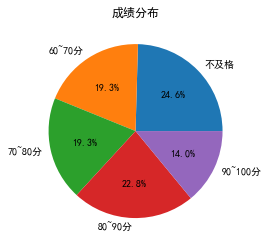

In [31]:
labels = ['不及格','60~70分','70~80分','80~90分','90~100分']
sizes = [a,b,c,d,e] #各个值 (最重要的数据 )
plt.pie(sizes,labels=labels,autopct='%.1f%%') #饼内百分数格式
plt.title("成绩分布")
plt.savefig('pie.png')
plt.show()

# 程序编写二

In [39]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing, model_selection, neighbors, metrics

In [40]:
# 从键盘输入随机数编号n，示例中n=42
n = int(input("请输入随机数编号：\n"))

请输入随机数编号：
42


In [41]:
# 加载并导入手写数字数据集
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 实例化转换器并对X进行数据标准化
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [42]:
# 划分训练集和测试集，测试样本占30%，随机数编号为n
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=n)

# 创建KNN分类器并在训练集上进行训练，最邻点数量为5，并在测试集上对结果进行预测
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [43]:
# 计算精确率并输出混淆矩阵，其中精确率评价值的平均值计算方式average设为'macro'，保留四位小数
precision = metrics.precision_score(y_test, y_pred, average='macro')
print("精确率: %.4f" % precision)
print("混淆矩阵:")
print(metrics.confusion_matrix(y_test, y_pred))

精确率: 0.9783
混淆矩阵:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  1  0  0  0  0 42  0]
 [ 0  0  0  2  1  1  1  0  1 53]]
